In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import skew, kurtosis

In [4]:
df=pd.read_csv(r"C:\Users\admin\Documents\youtube_project\dataset\youtube_ad_revenue_dataset.csv")

In [5]:
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [6]:
df.shape

(122400, 12)

In [7]:
df.sample(10,random_state=42)

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
20821,vid_1308,2024-12-26 10:50:40.993199,9866,554.0,293.0,29206.223552,22.119651,718514,Lifestyle,Desktop,DE,203.657208
43046,vid_4283,2024-07-11 10:50:40.993199,9925,1407.0,492.0,17817.864043,9.687818,600652,Entertainment,TV,IN,168.354889
111132,vid_4712,2024-10-31 10:50:40.993199,9856,562.0,154.0,34471.743970,23.528092,87982,Tech,TV,CA,226.178045
109329,vid_3410,2024-07-17 10:50:40.993199,10084,1510.0,171.0,33510.385483,9.660516,709660,Gaming,Desktop,UK,239.419450
43598,vid_1778,2024-12-04 10:50:40.993199,10093,595.0,467.0,28833.571508,23.991990,702388,Tech,Tablet,DE,206.778367
97830,vid_2324,2025-01-31 10:50:40.993199,9861,964.0,380.0,55950.846609,28.528608,683012,Education,Tablet,DE,338.261750
118531,vid_2590,2024-10-19 10:50:40.993199,10007,NaN,277.0,57592.535974,23.342249,196369,Entertainment,Desktop,US,332.685829
4232,vid_944,2025-02-18 10:50:40.993199,10122,NaN,436.0,51767.242519,21.228410,553506,Gaming,Mobile,DE,338.236816
82958,vid_4323,2025-05-03 10:50:40.993199,9886,851.0,355.0,40344.950380,4.188494,610780,Entertainment,Tablet,AU,262.445600
45412,vid_3358,2024-09-12 10:50:40.993199,9993,859.0,410.0,47963.844401,4.040126,735523,Music,TV,US,300.005463


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [9]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


##views normal distribution
##likes have null value
##comments also have null values
watch_times_minutes have null values

In [10]:
df.describe(include=object)

,video_id,date,category,device,country
count,122400,122400,122400,122400,122400
unique,5000,365,6,4,6
top,vid_3033,2025-04-03 10:50:40.993199,Education,TV,CA
freq,47,382,20514,30646,20603


##catagarical columns no null values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


##date dtype need to changes in datetime
##likes dtype need to change in int
##comments dtpe need to change in int

In [12]:
df.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(2400)

In [14]:
categorical_df=df.select_dtypes(exclude=['int','float'])
categorical_df

,video_id,date,category,device,country
0,vid_3092,2024-09-24 10:50:40.993199,Entertainment,TV,IN
1,vid_3459,2024-09-22 10:50:40.993199,Gaming,Tablet,CA
2,vid_4784,2024-11-21 10:50:40.993199,Education,TV,CA
3,vid_4078,2025-01-28 10:50:40.993199,Entertainment,Mobile,UK
4,vid_3522,2025-04-28 10:50:40.993199,Education,Mobile,CA
...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,Education,Tablet,US
122396,vid_3890,2024-07-13 10:50:40.993199,Music,Desktop,UK
122397,vid_3934,2024-06-10 10:50:40.993199,Tech,Tablet,CA
122398,vid_4260,2024-12-22 10:50:40.993199,Music,Mobile,UK


In [15]:
df['country'].value_counts()

country
CA    20603
DE    20582
IN    20564
AU    20313
UK    20269
US    20069
Name: count, dtype: int64

In [16]:
df['device'].value_counts()

device
TV         30646
Mobile     30598
Tablet     30579
Desktop    30577
Name: count, dtype: int64

In [17]:
df['category'].value_counts()

category
Education        20514
Music            20475
Tech             20444
Entertainment    20411
Gaming           20359
Lifestyle        20197
Name: count, dtype: int64

In [18]:
numarical_df=df.select_dtypes(include=['int','float'])
numarical_df

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
0,9936,1221.0,320.0,26497.214184,2.862137,228086,203.178237
1,10017,642.0,346.0,15209.747445,23.738069,736015,140.880508
2,10097,1979.0,187.0,57332.658498,26.200634,240534,360.134008
3,10034,1191.0,242.0,31334.517771,11.770340,434482,224.638261
4,9889,1858.0,477.0,15665.666434,6.635854,42030,165.514388
...,...,...,...,...,...,...,...
122395,9853,1673.0,147.0,42075.704885,25.490195,210818,280.986396
122396,10128,1709.0,63.0,57563.703040,16.229133,878860,354.612981
122397,10267,700.0,NaN,27549.714659,23.822365,576756,203.643106
122398,10240,1616.0,106.0,56967.384382,7.753099,585138,351.525811


In [19]:
numarical_df.corr(method='pearson')   # Pearson


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
views,1.000000,0.016101,0.019563,0.027236,0.001074,0.000774,0.038497
likes,0.016101,1.000000,-0.002063,0.003110,0.001250,0.003563,0.146449
comments,0.019563,-0.002063,1.000000,-0.001006,-0.002665,-0.001556,0.034274
watch_time_minutes,0.027236,0.003110,-0.001006,1.000000,-0.000952,0.005513,0.988874
video_length_minutes,0.001074,0.001250,-0.002665,-0.000952,1.000000,0.002578,-0.000446
subscribers,0.000774,0.003563,-0.001556,0.005513,0.002578,1.000000,0.005907
ad_revenue_usd,0.038497,0.146449,0.034274,0.988874,-0.000446,0.005907,1.000000


In [20]:
numarical_df.corr(method='spearman')

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
views,1.000000,0.015485,0.018852,0.026099,0.000340,0.000286,0.035818
likes,0.015485,1.000000,-0.002042,0.003078,0.001239,0.003549,0.141153
comments,0.018852,-0.002042,1.000000,-0.001015,-0.002680,-0.001556,0.032896
watch_time_minutes,0.026099,0.003078,-0.001015,1.000000,-0.000941,0.005537,0.989409
video_length_minutes,0.000340,0.001239,-0.002680,-0.000941,1.000000,0.002589,-0.000398
subscribers,0.000286,0.003549,-0.001556,0.005537,0.002589,1.000000,0.005994
ad_revenue_usd,0.035818,0.141153,0.032896,0.989409,-0.000398,0.005994,1.000000


In [21]:
##ad revenue highlt co-relation with watch-time-minutes
##likes also co-relate with ad-revenue

##DATA CLEANING

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6000
comments                6000
watch_time_minutes      6000
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

<Axes: ylabel='Frequency'>

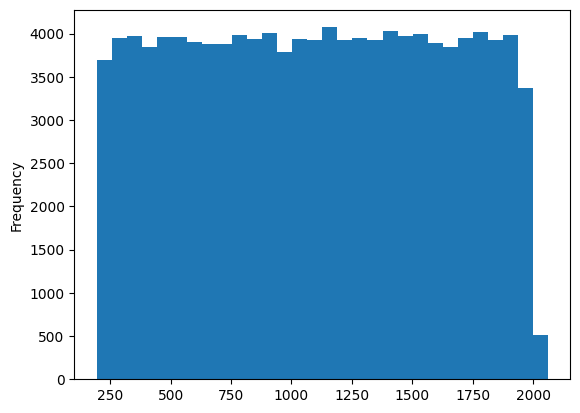

In [24]:
df['likes'].plot(kind='hist',bins=30)

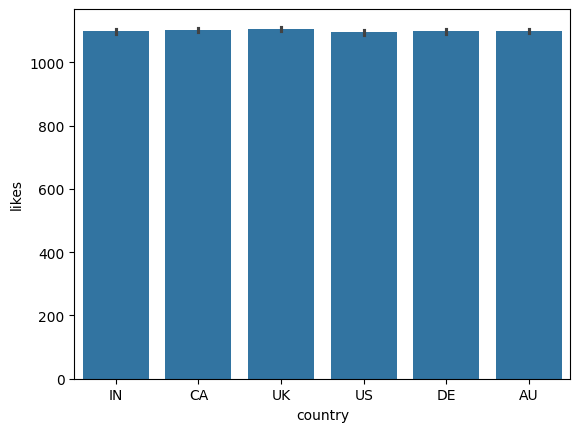

In [25]:
sns.barplot(x='country', y='likes', data=df)
plt.show()

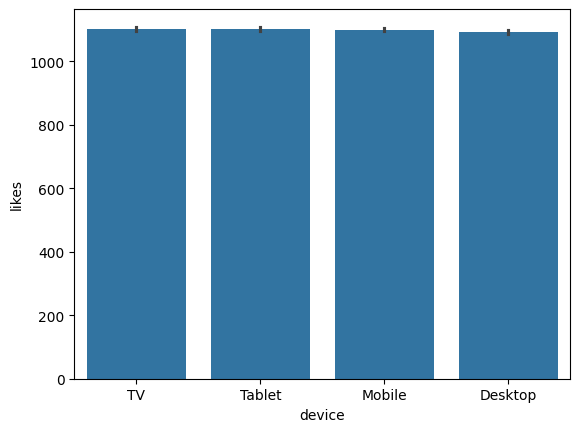

In [26]:
sns.barplot(x='device', y='likes', data=df)
plt.show()

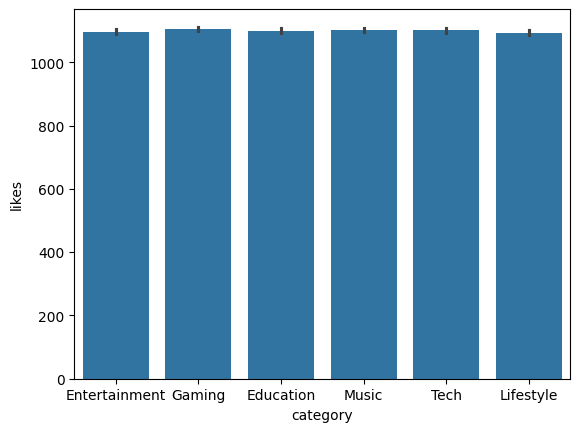

In [27]:
sns.barplot(x='category', y='likes', data=df)
plt.show()

In [28]:
df['likes']=df['likes'].fillna(df['likes'].median())

In [29]:
df['likes'].isna().sum()

np.int64(0)

<Axes: ylabel='Frequency'>

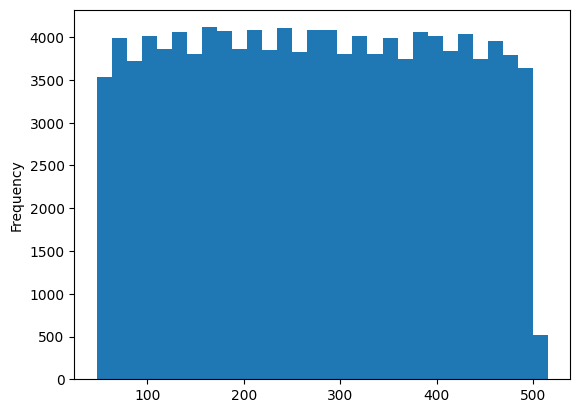

In [30]:
df['comments'].plot(kind='hist',bins=30)

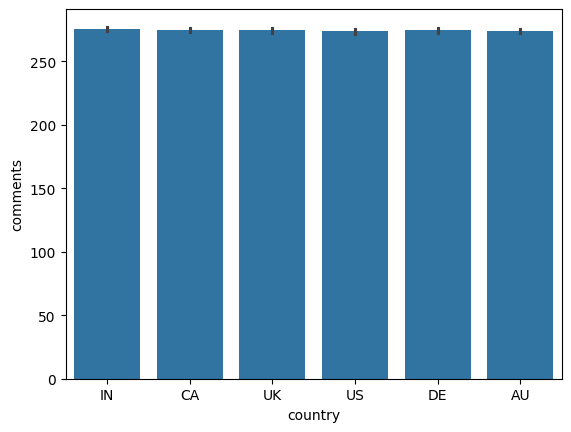

In [31]:
sns.barplot(x='country', y='comments', data=df)
plt.show()

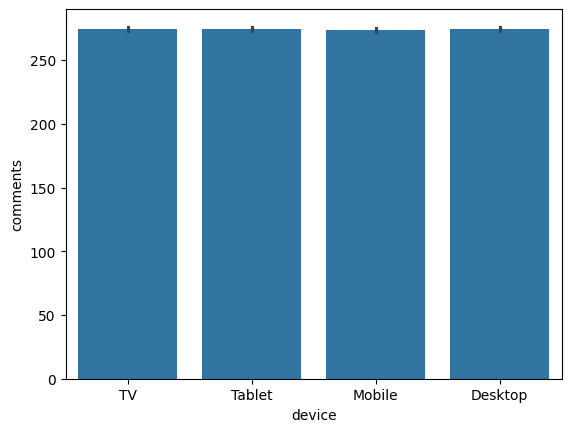

In [32]:
sns.barplot(x='device', y='comments', data=df)
plt.show()

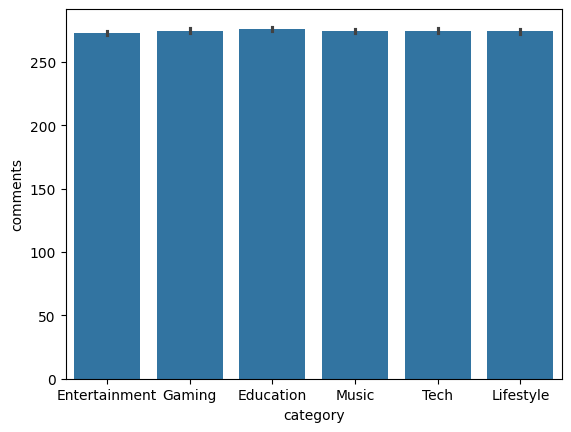

In [33]:
sns.barplot(x='category', y='comments', data=df)
plt.show()

In [34]:
df['comments']=df['comments'].fillna(df['comments'].median())

In [35]:
df['comments'].isna().sum()

np.int64(0)

<Axes: ylabel='Frequency'>

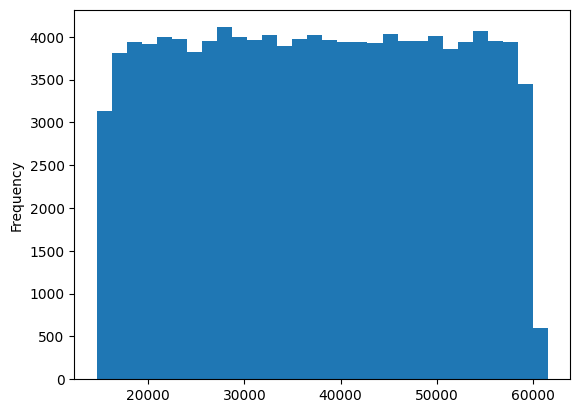

In [36]:
df['watch_time_minutes'].plot(kind='hist',bins=30)

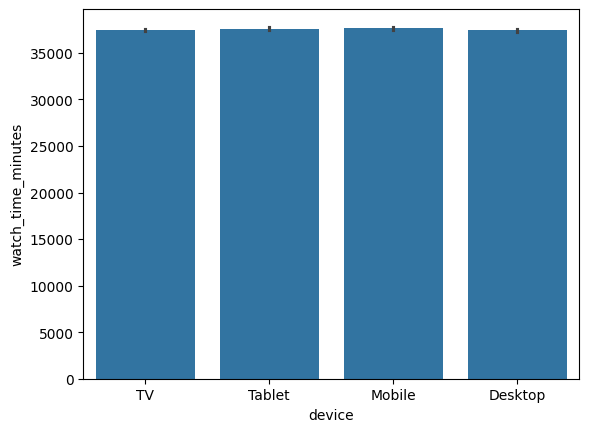

In [37]:
sns.barplot(x='device', y='watch_time_minutes', data=df)
plt.show()

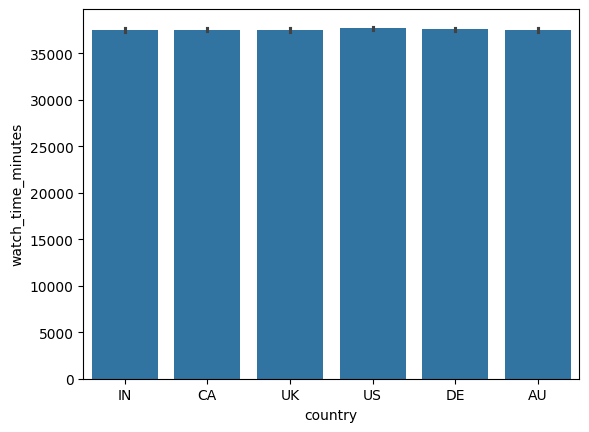

In [38]:
sns.barplot(x='country', y='watch_time_minutes', data=df)
plt.show()

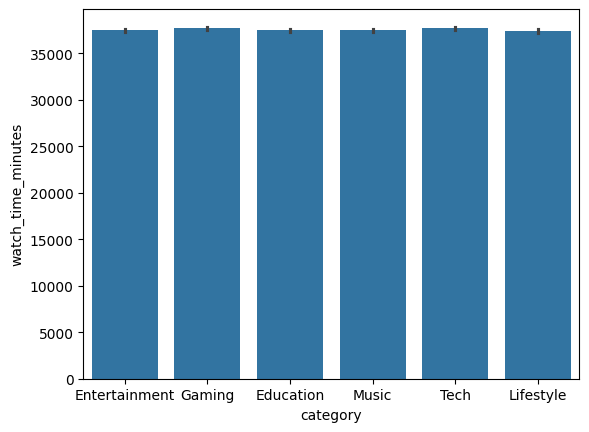

In [39]:
sns.barplot(x='category', y='watch_time_minutes', data=df)
plt.show()

In [40]:
df['watch_time_minutes']=df['watch_time_minutes'].fillna(df['watch_time_minutes'].median())

In [41]:
df['watch_time_minutes'].isna().sum()

np.int64(0)

In [42]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,9999.832333,1099.705792,274.332350,37539.823485,16.017910,502291.970050,252.711361
std,99.918405,506.372185,126.461529,12658.957710,8.084928,288364.967705,61.954125
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,673.000000,168.000000,26949.914101,9.005928,252641.500000,199.892158
50%,10000.000000,1102.000000,274.000000,37522.221205,16.009269,503633.500000,252.678607
75%,10067.000000,1524.000000,381.000000,48209.880123,23.026064,752386.250000,305.613497
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


In [43]:
df['comments'].isna().sum()

np.int64(0)

###outliers handle

In [44]:
Q1=np.percentile(df['views'],25)
Q3=np.percentile(df['views'],75)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR


In [45]:
upper_bound


np.float64(10268.0)

In [46]:
lower_bound

np.float64(9732.0)

<Axes: xlabel='views'>

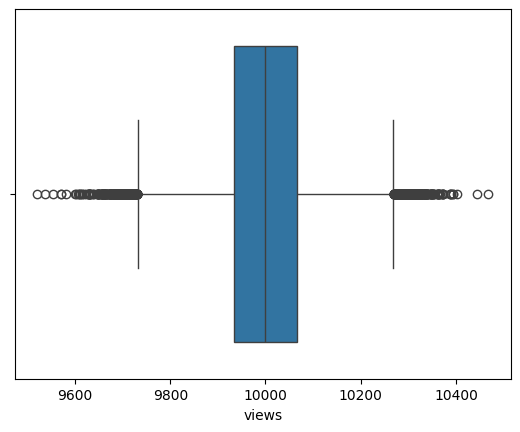

In [47]:
sns.boxplot(x='views', data=df)

In [48]:
df.dtypes

video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
dtype: object

In [49]:
df['date']=pd.to_datetime(df['date'],format='mixed')

In [50]:
df['likes']=df['likes'].astype('Int64')

In [51]:
df['comments']=df['comments'].astype('Int64')

In [52]:
df['video_id'].value_counts()

video_id
vid_3033    46
vid_1725    42
vid_4483    42
vid_988     41
vid_2429    40
            ..
vid_3847    11
vid_3001    11
vid_4852    11
vid_1629    10
vid_4163    10
Name: count, Length: 5000, dtype: int64

In [53]:
df['date'].value_counts()

date
2025-04-03 10:50:40.993199    378
2024-08-11 10:50:40.993199    373
2025-01-28 10:50:40.993199    373
2025-02-10 10:50:40.993199    368
2025-05-07 10:50:40.993199    367
                             ... 
2025-06-01 10:50:40.993199    290
2025-01-19 10:50:40.993199    290
2025-01-25 10:50:40.993199    285
2025-04-16 10:50:40.993199    283
2024-06-29 10:50:40.993199    279
Name: count, Length: 365, dtype: int64

## Univariate Analysis

In [54]:
numarical_df=df.select_dtypes(include=['int','float'])
numarical_df

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
0,9936,1221,320,26497.214184,2.862137,228086,203.178237
1,10017,642,346,15209.747445,23.738069,736015,140.880508
2,10097,1979,187,57332.658498,26.200634,240534,360.134008
3,10034,1191,242,31334.517771,11.770340,434482,224.638261
4,9889,1858,477,15665.666434,6.635854,42030,165.514388
...,...,...,...,...,...,...,...
122395,9853,1673,147,42075.704885,25.490195,210818,280.986396
122396,10128,1709,63,57563.703040,16.229133,878860,354.612981
122397,10267,700,274,27549.714659,23.822365,576756,203.643106
122398,10240,1616,106,56967.384382,7.753099,585138,351.525811


In [55]:
df.describe()

,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,120000,120000.000000,120000.0,120000.0,120000.000000,120000.000000,120000.000000,120000.000000
mean,2024-12-08 03:24:11.233198848,9999.832333,1099.705792,274.33235,37539.823485,16.017910,502291.970050,252.711361
min,2024-06-09 10:50:40.993199,9521.000000,195.0,48.0,14659.105562,2.000142,1005.000000,126.590603
25%,2024-09-07 10:50:40.993199104,9933.000000,673.0,168.0,26949.914101,9.005928,252641.500000,199.892158
50%,2024-12-08 10:50:40.993199104,10000.000000,1102.0,274.0,37522.221205,16.009269,503633.500000,252.678607
75%,2025-03-09 10:50:40.993199104,10067.000000,1524.0,381.0,48209.880123,23.026064,752386.250000,305.613497
max,2025-06-08 10:50:40.993199,10468.000000,2061.0,515.0,61557.670089,29.999799,999997.000000,382.768254
std,NaN,99.918405,506.372185,126.461529,12658.957710,8.084928,288364.967705,61.954125


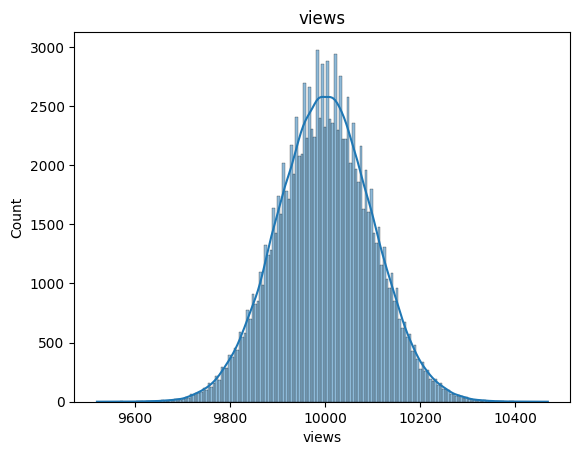

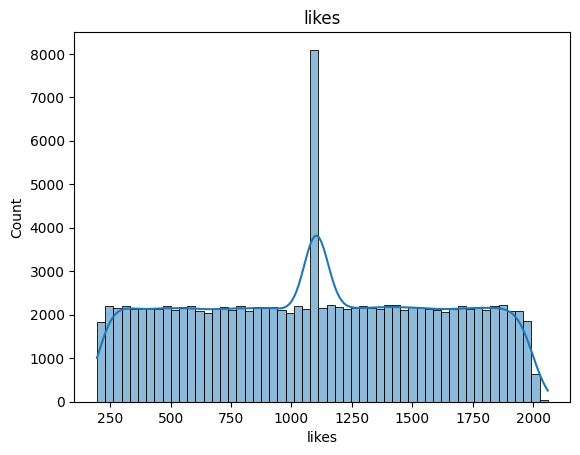

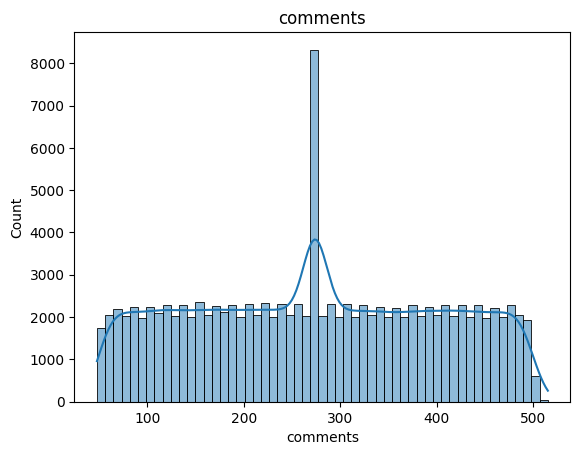

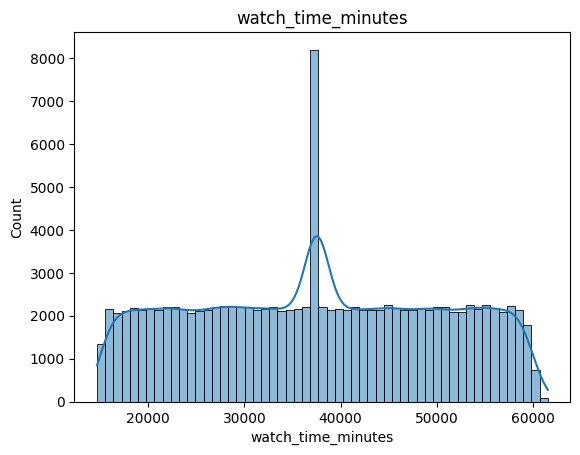

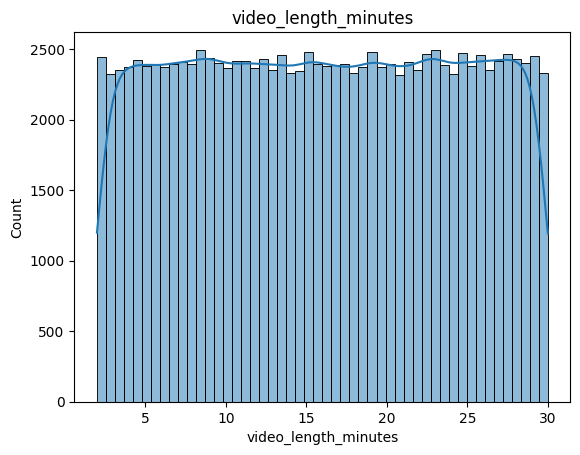

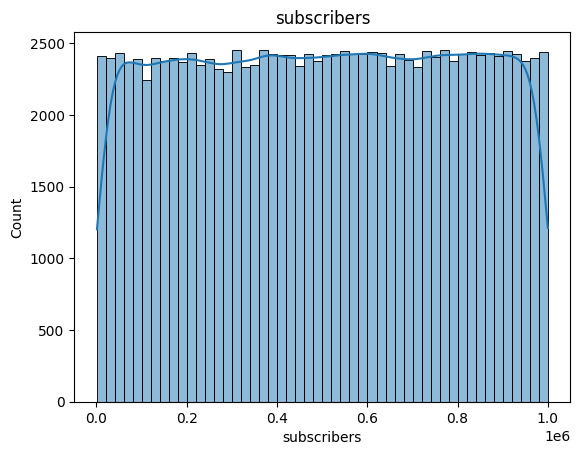

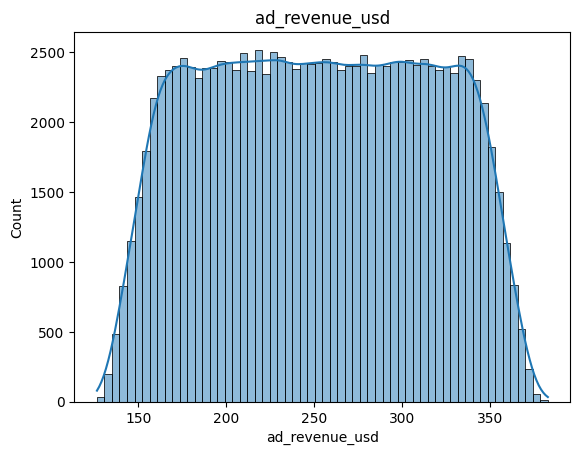

In [56]:
for i in numarical_df.columns:
    sns.histplot(numarical_df[i], kde=True)
    plt.title(i)
    plt.show()

In [57]:
for i in numarical_df.columns:
    print(i)
    skewness = skew(numarical_df[i])
    kurt = kurtosis(numarical_df[i])
    print(f'{i} skewness:{skewness}\n{i} kurtosis:{kurt}')


views
views skewness:-0.002911932149431459
views kurtosis:0.01566776655167379
likes
likes skewness:-0.002974486239046693
likes kurtosis:-1.1017986759569365
comments
comments skewness:0.00885884856393756
comments kurtosis:-1.098692921858932
watch_time_minutes
watch_time_minutes skewness:0.0017900136396189006
watch_time_minutes kurtosis:-1.1000938022847961
video_length_minutes
video_length_minutes skewness:-0.001861163089223996
video_length_minutes kurtosis:-1.2028373689978817
subscribers
subscribers skewness:-0.009575167614425966
subscribers kurtosis:-1.1976189197881033
ad_revenue_usd
ad_revenue_usd skewness:0.0009478828462464436
ad_revenue_usd kurtosis:-1.1404470501760324


In [58]:
categorical_df=df.select_dtypes(include=object)
categorical_df

,video_id,category,device,country
0,vid_3092,Entertainment,TV,IN
1,vid_3459,Gaming,Tablet,CA
2,vid_4784,Education,TV,CA
3,vid_4078,Entertainment,Mobile,UK
4,vid_3522,Education,Mobile,CA
...,...,...,...,...
122395,vid_2902,Education,Tablet,US
122396,vid_3890,Music,Desktop,UK
122397,vid_3934,Tech,Tablet,CA
122398,vid_4260,Music,Mobile,UK


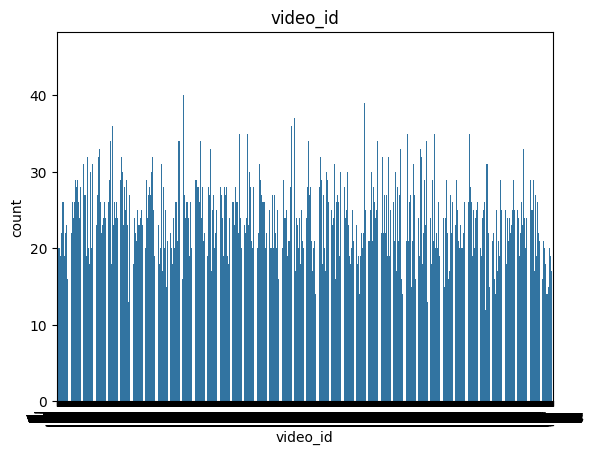

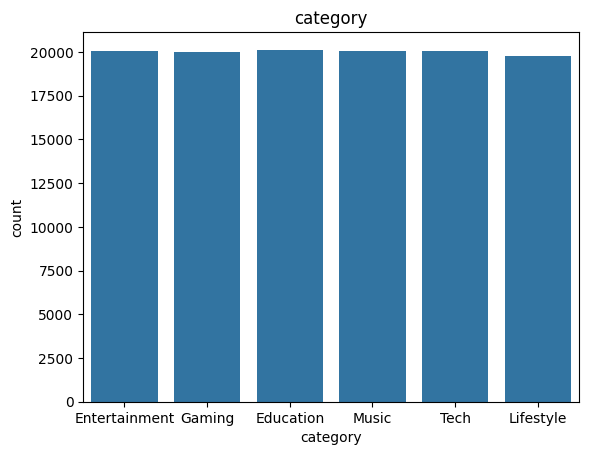

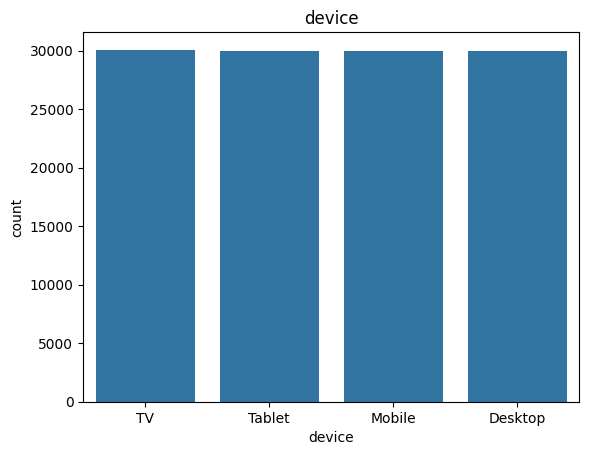

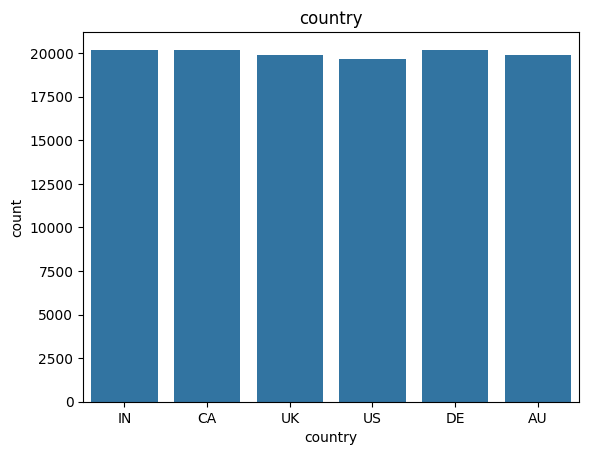

In [59]:
for i in categorical_df.columns:
    sns.countplot(x=i, data=categorical_df)
    plt.title(i)
    plt.show()

##Bivariate & Multivariate Analysis

In [60]:
##Numerical vs Numerical (Scatterplots, Correlation Heatmaps)

In [61]:
numarical_df

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
0,9936,1221,320,26497.214184,2.862137,228086,203.178237
1,10017,642,346,15209.747445,23.738069,736015,140.880508
2,10097,1979,187,57332.658498,26.200634,240534,360.134008
3,10034,1191,242,31334.517771,11.770340,434482,224.638261
4,9889,1858,477,15665.666434,6.635854,42030,165.514388
...,...,...,...,...,...,...,...
122395,9853,1673,147,42075.704885,25.490195,210818,280.986396
122396,10128,1709,63,57563.703040,16.229133,878860,354.612981
122397,10267,700,274,27549.714659,23.822365,576756,203.643106
122398,10240,1616,106,56967.384382,7.753099,585138,351.525811


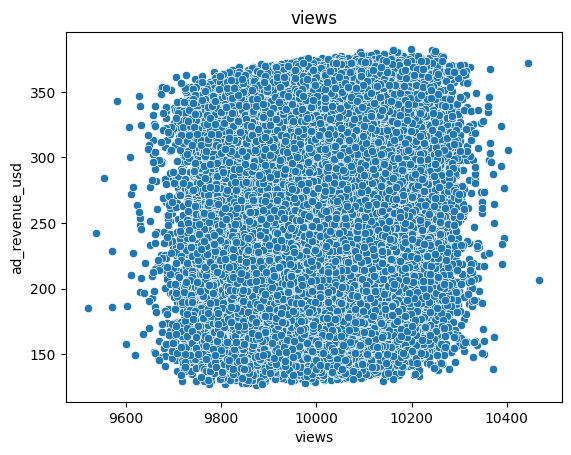

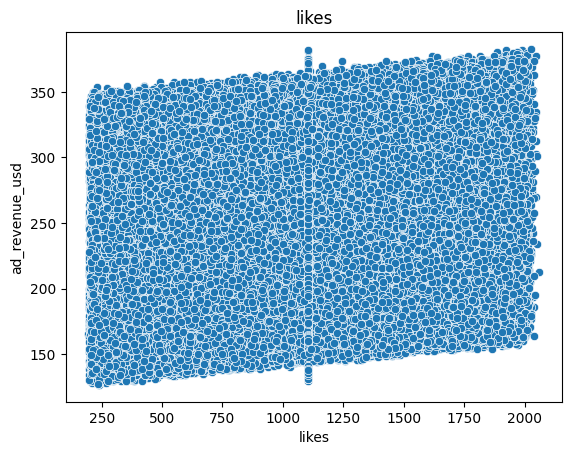

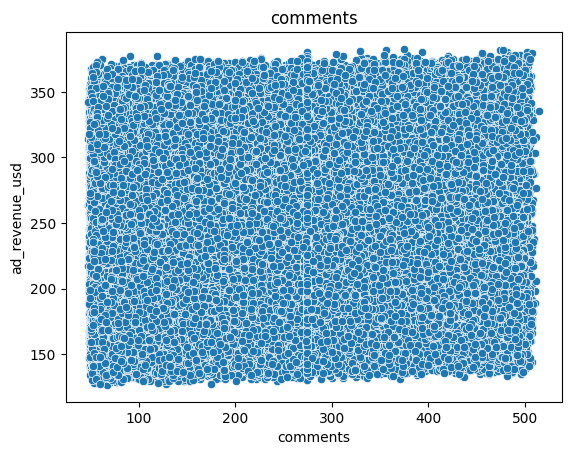

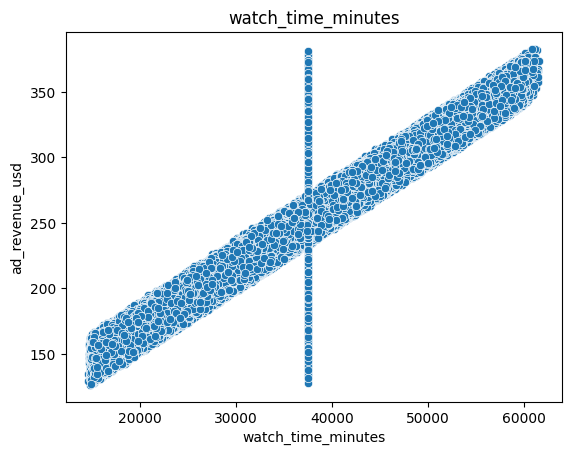

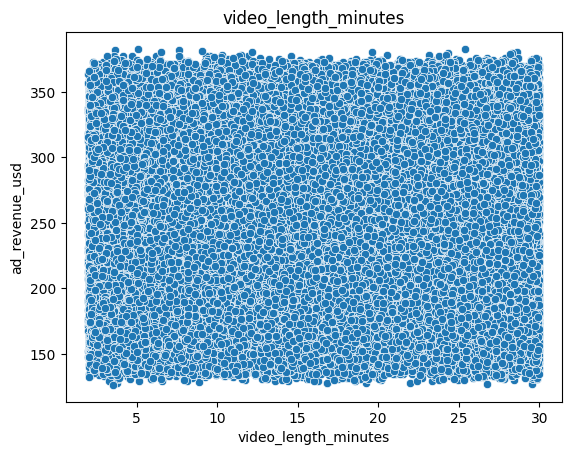

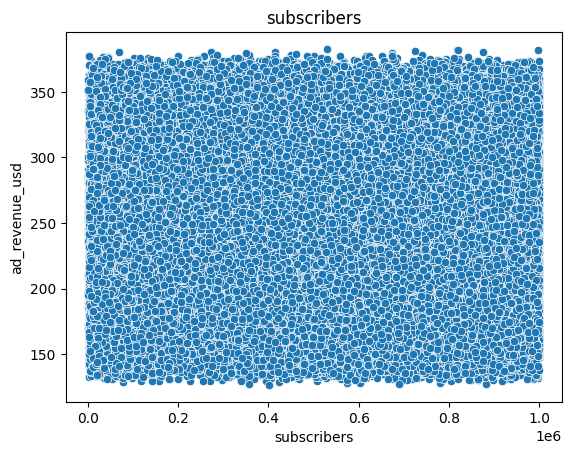

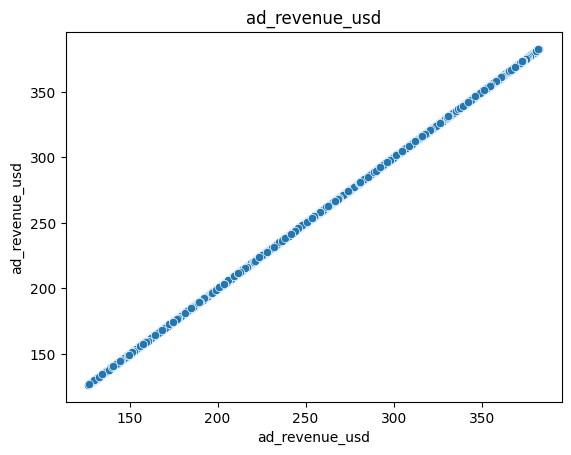

In [62]:
for i in numarical_df.columns:
    sns.scatterplot(x=i, y="ad_revenue_usd", data=numarical_df)
    plt.title(i)
    plt.show()

In [63]:
numarical_df.corr(method='pearson')   # Pearson


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
views,1.000000,0.015200,0.018141,0.026065,0.001171,0.000750,0.037942
likes,0.015200,1.000000,-0.002032,0.002722,0.001773,0.003524,0.142571
comments,0.018141,-0.002032,1.000000,-0.000713,-0.002174,-0.001525,0.033630
watch_time_minutes,0.026065,0.002722,-0.000713,1.000000,-0.000388,0.004617,0.964052
video_length_minutes,0.001171,0.001773,-0.002174,-0.000388,1.000000,0.002015,0.000364
subscribers,0.000750,0.003524,-0.001525,0.004617,0.002015,1.000000,0.005065
ad_revenue_usd,0.037942,0.142571,0.033630,0.964052,0.000364,0.005065,1.000000


In [64]:
numarical_df.corr(method='spearman') 

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
views,1.000000,0.014160,0.016962,0.024414,0.000393,0.000199,0.035345
likes,0.014160,1.000000,-0.001950,0.002613,0.001655,0.003640,0.137354
comments,0.016962,-0.001950,1.000000,-0.000608,-0.002200,-0.001470,0.032218
watch_time_minutes,0.024414,0.002613,-0.000608,1.000000,-0.000365,0.004597,0.963926
video_length_minutes,0.000393,0.001655,-0.002200,-0.000365,1.000000,0.002026,0.000424
subscribers,0.000199,0.003640,-0.001470,0.004597,0.002026,1.000000,0.005123
ad_revenue_usd,0.035345,0.137354,0.032218,0.963926,0.000424,0.005123,1.000000


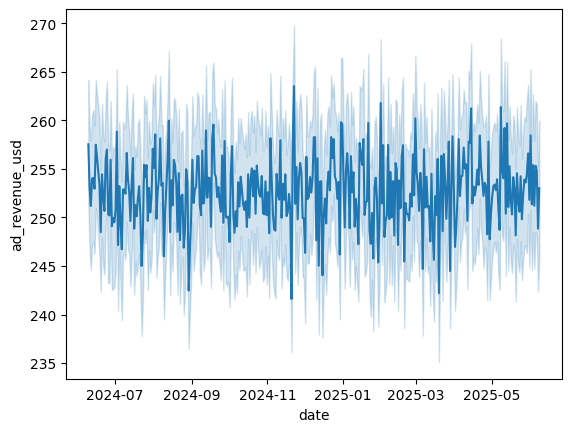

In [65]:
sns.lineplot(x='date', y='ad_revenue_usd', data=df)
plt.show()

In [66]:
categorical_df=df.select_dtypes(include=object)

In [67]:
df['country'].value_counts()

country
CA    20198
DE    20160
IN    20156
AU    19911
UK    19893
US    19682
Name: count, dtype: int64

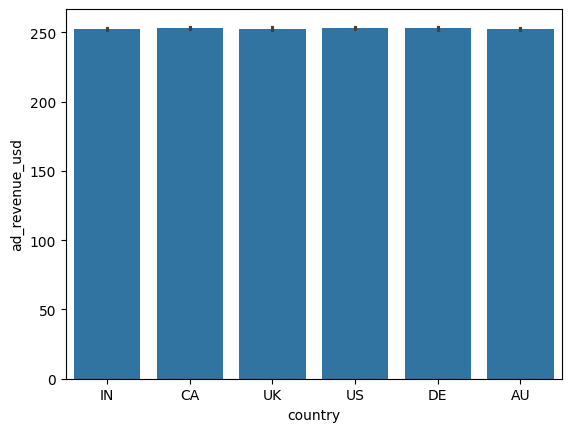

In [68]:
sns.barplot(x='country', y='ad_revenue_usd', data=df)
plt.show()

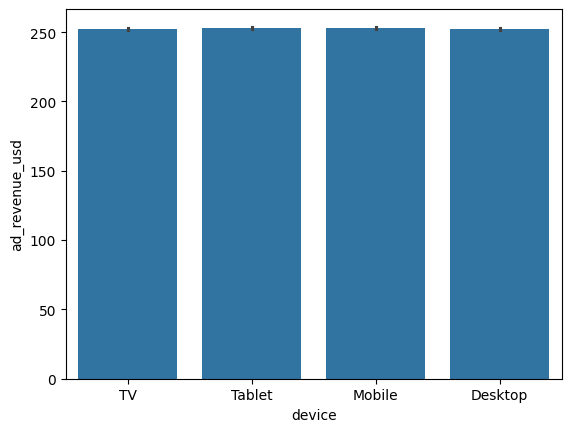

In [69]:

sns.barplot(x='device', y='ad_revenue_usd', data=df)
plt.show()

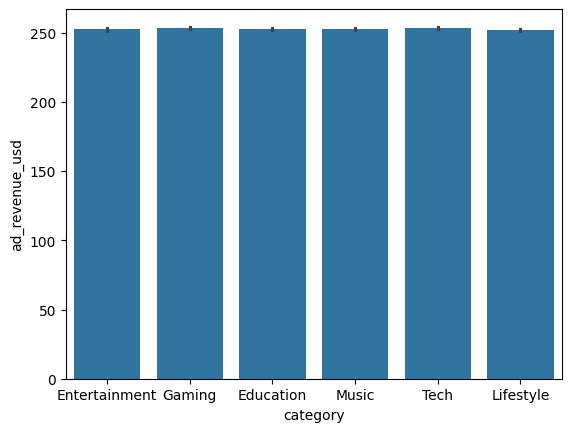

In [70]:

sns.barplot(x='category', y='ad_revenue_usd', data=df)
plt.show()

In [71]:
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221,320,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642,346,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979,187,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191,242,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858,477,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [72]:
categorical_df


,video_id,category,device,country
0,vid_3092,Entertainment,TV,IN
1,vid_3459,Gaming,Tablet,CA
2,vid_4784,Education,TV,CA
3,vid_4078,Entertainment,Mobile,UK
4,vid_3522,Education,Mobile,CA
...,...,...,...,...
122395,vid_2902,Education,Tablet,US
122396,vid_3890,Music,Desktop,UK
122397,vid_3934,Tech,Tablet,CA
122398,vid_4260,Music,Mobile,UK


In [73]:
df.groupby('category')['ad_revenue_usd'].mean()

category
Education        252.564162
Entertainment    252.397546
Gaming           253.426887
Lifestyle        251.936934
Music            252.477374
Tech             253.458882
Name: ad_revenue_usd, dtype: float64

In [74]:
from scipy.stats import f_oneway

# Test scores from 3 different classes
groups = df.groupby('category')['ad_revenue_usd'].apply(list)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

F-statistic: 1.9171
p-value: 0.0879
Fail to reject the null hypothesis: No significant difference.


In [75]:
from scipy.stats import f_oneway

# Test scores from 3 different classes
groups = df.groupby('device')['ad_revenue_usd'].apply(list)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

F-statistic: 1.8130
p-value: 0.1423
Fail to reject the null hypothesis: No significant difference.


In [76]:
from scipy.stats import f_oneway

# Test scores from 3 different classes
groups = df.groupby('country')['ad_revenue_usd'].apply(list)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

F-statistic: 0.3814
p-value: 0.8619
Fail to reject the null hypothesis: No significant difference.


##Feature Engineering Insights

In [77]:
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221,320,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642,346,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979,187,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191,242,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858,477,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [78]:
#df.drop('video_id',axis=1)

In [79]:
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221,320,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642,346,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979,187,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191,242,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858,477,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [80]:
df['day_of_week'] = df['date'].dt.day_name()

In [81]:
df['month_name'] = df['date'].dt.month_name()

In [82]:
df['year'] = df['date'].dt.year

In [83]:
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']

In [84]:
numarical_df=df.select_dtypes(include=['int','float'])

In [85]:
numarical_df.corr(method='pearson').loc['ad_revenue_usd']

views                   0.037942
likes                   0.142571
comments                0.033630
watch_time_minutes      0.964052
video_length_minutes    0.000364
subscribers             0.005065
ad_revenue_usd          1.000000
year                    0.001053
engagement_rate         0.145552
Name: ad_revenue_usd, dtype: float64

In [86]:
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,day_of_week,month_name,year,engagement_rate
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221,320,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,Tuesday,September,2024,0.155093
1,vid_3459,2024-09-22 10:50:40.993199,10017,642,346,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,Sunday,September,2024,0.098632
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979,187,57332.658498,26.200634,240534,Education,TV,CA,360.134008,Thursday,November,2024,0.214519
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191,242,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,Tuesday,January,2025,0.142814
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858,477,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,Monday,April,2025,0.236121


In [90]:
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,day_of_week,month_name,year,engagement_rate
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221,320,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,Tuesday,September,2024,0.155093
1,vid_3459,2024-09-22 10:50:40.993199,10017,642,346,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,Sunday,September,2024,0.098632
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979,187,57332.658498,26.200634,240534,Education,TV,CA,360.134008,Thursday,November,2024,0.214519
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191,242,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,Tuesday,January,2025,0.142814
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858,477,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,Monday,April,2025,0.236121


In [91]:
df=df.drop(['video_id','date','video_length_minutes','day_of_week','month_name','year','engagement_rate'],axis=1)

In [92]:
df.head()

,views,likes,comments,watch_time_minutes,subscribers,category,device,country,ad_revenue_usd
0,9936,1221,320,26497.214184,228086,Entertainment,TV,IN,203.178237
1,10017,642,346,15209.747445,736015,Gaming,Tablet,CA,140.880508
2,10097,1979,187,57332.658498,240534,Education,TV,CA,360.134008
3,10034,1191,242,31334.517771,434482,Entertainment,Mobile,UK,224.638261
4,9889,1858,477,15665.666434,42030,Education,Mobile,CA,165.514388


In [96]:
df['category'].value_counts()

category
Education        20123
Music            20065
Tech             20028
Entertainment    20025
Gaming           19974
Lifestyle        19785
Name: count, dtype: int64

In [93]:
df["watch_time_minutes"] = df["watch_time_minutes"].round(2)

In [94]:
df.dtypes

views                   int64
likes                   Int64
comments                Int64
watch_time_minutes    float64
subscribers             int64
category               object
device                 object
country                object
ad_revenue_usd        float64
dtype: object

In [95]:
df.to_csv('preprocessed.csv')